Sample Data:


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB

Direction value counts:
Direction
1    648
0    602
Name: count, dtype: int64


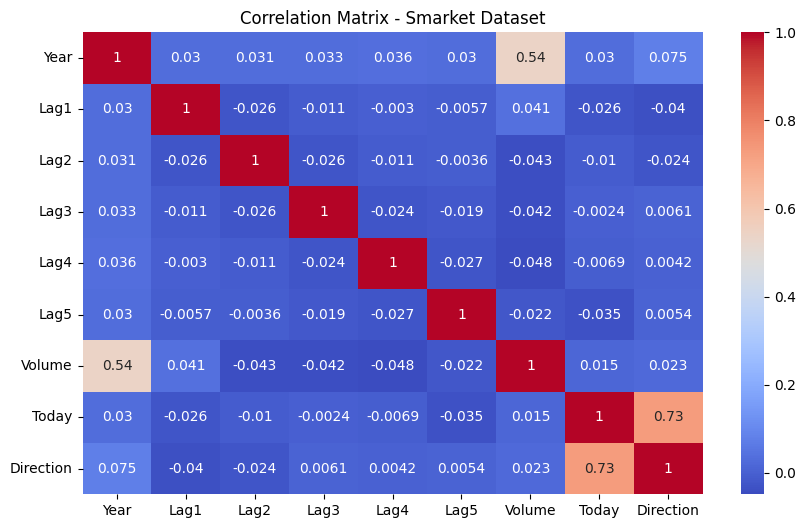


Correlation of predictors with Direction:
Year      0.074608
Lag1     -0.039757
Lag2     -0.024081
Lag3      0.006132
Lag4      0.004215
Lag5      0.005423
Volume    0.022951
Today     0.730563
Name: Direction, dtype: float64

Selected Predictors for Logistic Regression: ['Year', 'Today']

Model Accuracy: 0.996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       132
           1       0.99      1.00      1.00       118

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



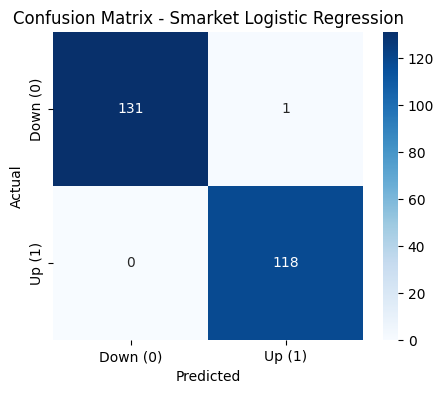

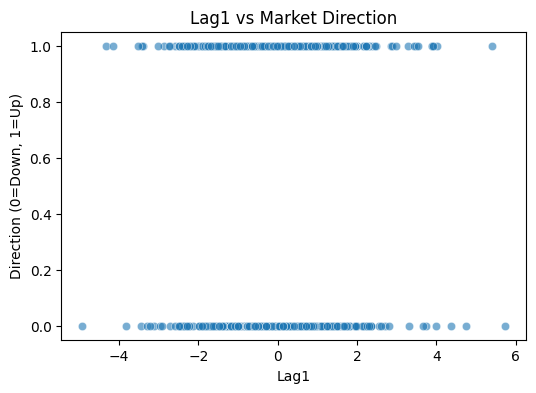

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ml-practical/datasets/Smarket.csv')

# Display first few rows
print("Sample Data:")
display(df.head())

# Check dataset information
print("\nDataset Info:")
df.info()

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert target column 'Direction' to numeric (Up=1, Down=0)
df['Direction'] = df['Direction'].map({'Up': 1, 'Down': 0})

# Check for successful mapping
print("\nDirection value counts:")
print(df['Direction'].value_counts())

# Compute correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Smarket Dataset')
plt.show()

# Examine correlation of predictors with target
correlations = df.corr()['Direction'].drop('Direction')
print("\nCorrelation of predictors with Direction:")
print(correlations)

# Select predictors based on significant correlation (absolute value > 0.05 for example)
selected_features = correlations[abs(correlations) > 0.05].index.tolist()
if not selected_features:
    selected_features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']  # use all if correlations small

print("\nSelected Predictors for Logistic Regression:", selected_features)

# Define X (features) and y (target)
X = df[selected_features]
y = df['Direction']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down (0)', 'Up (1)'], yticklabels=['Down (0)', 'Up (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Smarket Logistic Regression')
plt.show()

# Plot logistic relationship for one key predictor (e.g., Lag1)
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Lag1'], y=df['Direction'], alpha=0.6)
plt.title('Lag1 vs Market Direction')
plt.xlabel('Lag1')
plt.ylabel('Direction (0=Down, 1=Up)')
plt.show()
